# Correlation Map Gallery

This notebook serves as an illustrative guide to the different options you can set to make a compelling correlation map predominately using Seaborn. Correlation maps get more complex as the notebook progresses. 

For additional options not explored here, as always, check out the official documentation: [Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

## Setup and Preferences

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from heatmap import heatmap, corrplot
import networkx as nx
import solar_corr

sns.set(color_codes=True, font_scale=1.2)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (6,5)

## Load Data

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

housing = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

##### Calculate Correlation Matrix for Numeric Columns

In [3]:
corr = housing.select_dtypes('number').corr()

## Correlation Map Gallery

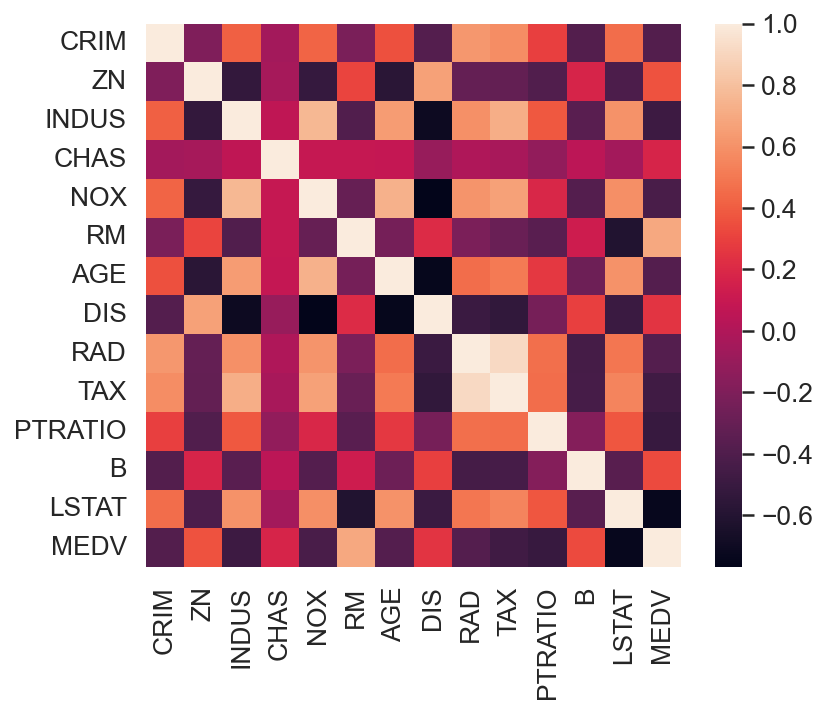

In [4]:
sns.heatmap(corr);

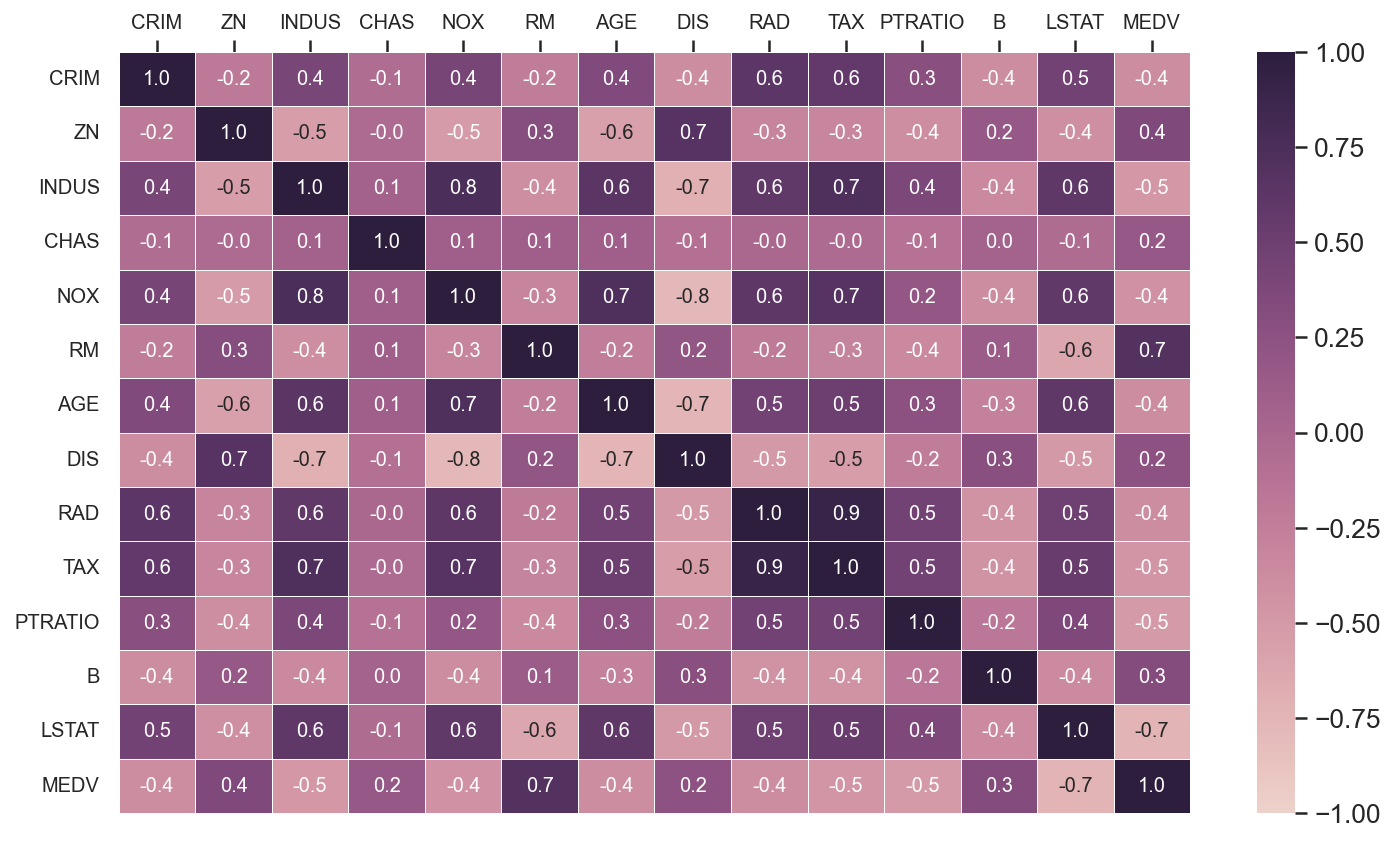

In [5]:
plt.figure(figsize=(12, 7))

ax = sns.heatmap(
    corr, 
    cmap=sns.cubehelix_palette(as_cmap=True), 
    annot=True, 
    fmt='.1f', 
    linewidth=.5,
    vmin=-1,
    vmax=1
)

ax.set(xlabel='', ylabel='')
ax.xaxis.tick_top()
ax.set_xticklabels(corr.columns, fontsize=10)
ax.set_yticklabels(corr.columns, fontsize=10);

# Try changing the "cmap" argument:
# "YlGnBu"
# "Blues"
# "BuGn_r"

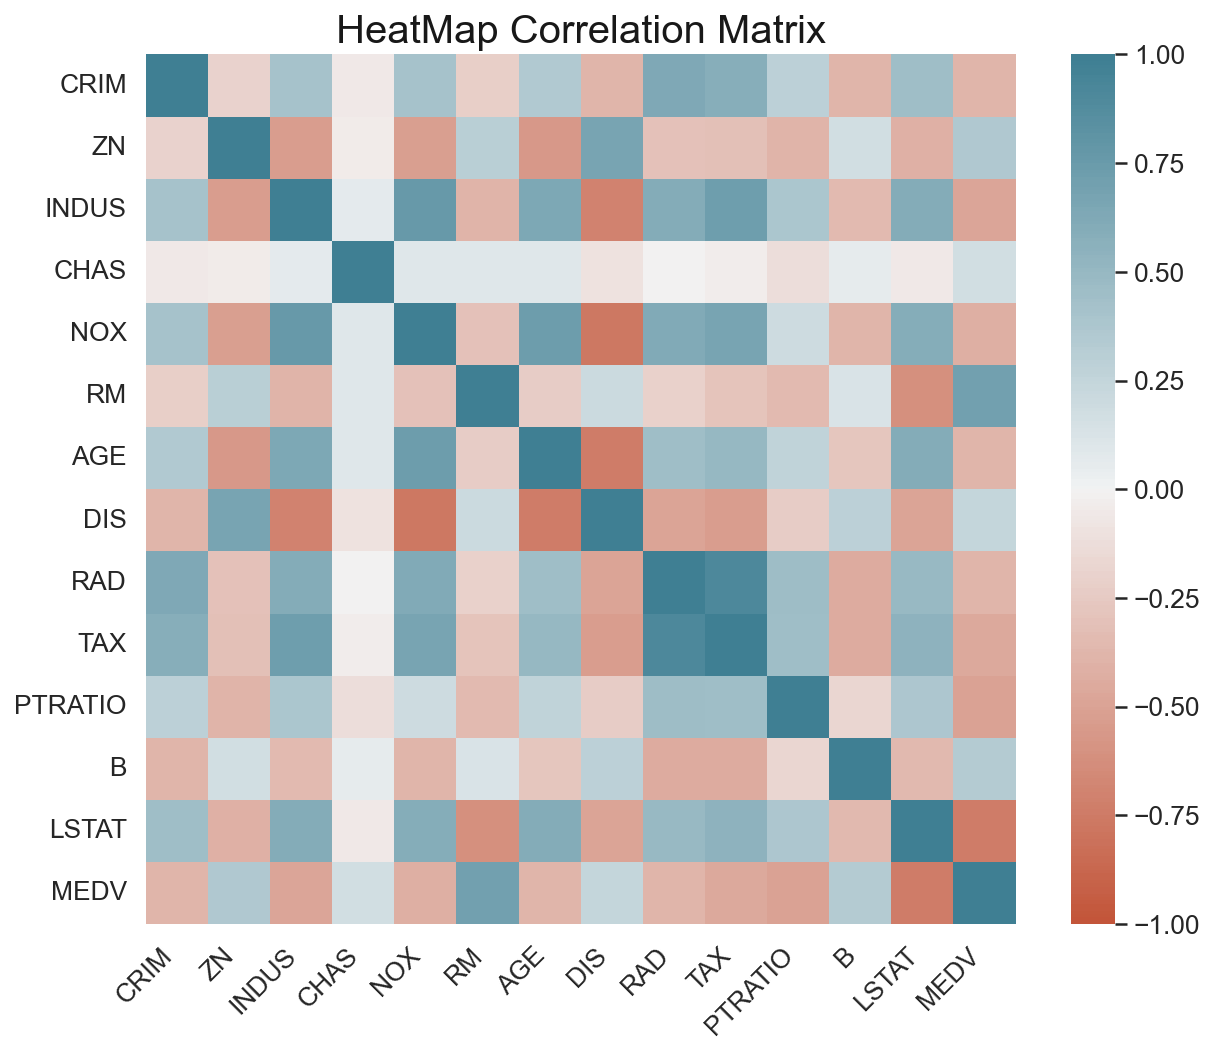

In [6]:
# Add title and assign size of heatmap
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.title(
    'HeatMap Correlation Matrix', 
    size=20, 
    color='Black', 
    alpha=0.9)

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

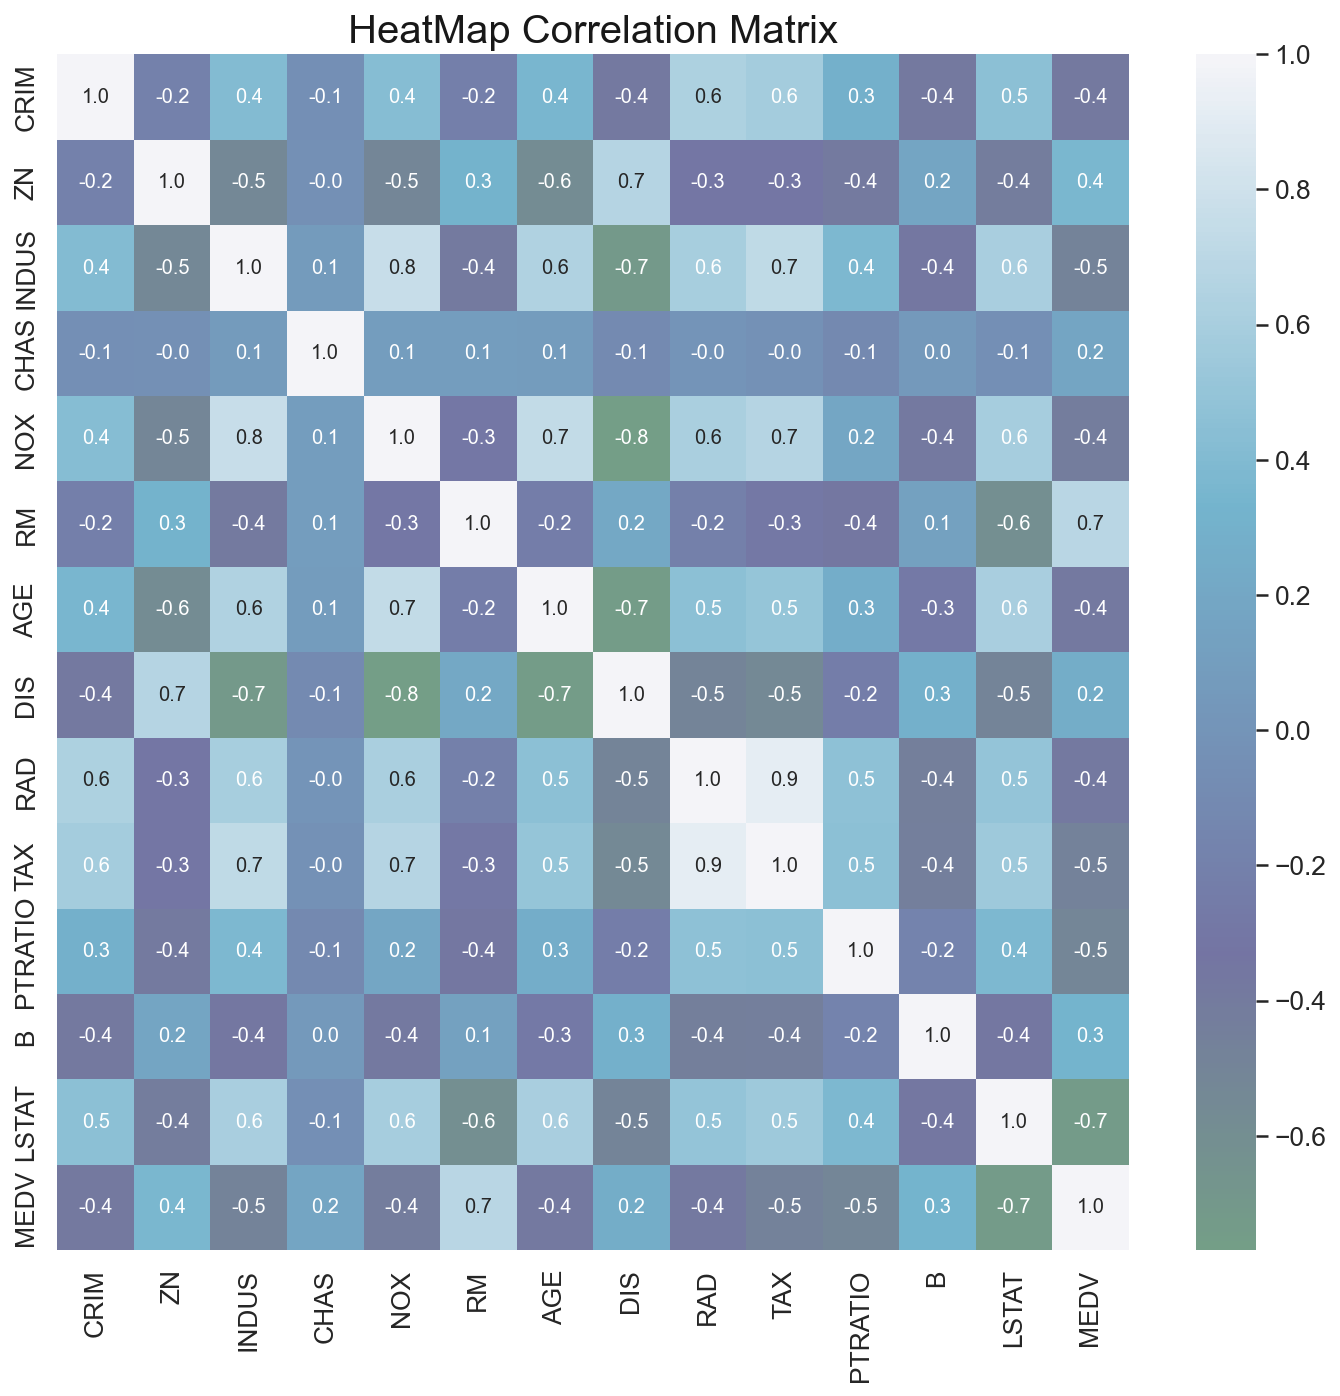

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12,11)
plt.title(
    'HeatMap Correlation Matrix', 
    size=20, 
    color='Black', 
    alpha=0.9)

sns.heatmap(
    corr, 
    annot=True, 
    fmt='.1f', 
    cmap='ocean', 
    center=0, 
    alpha=0.5);

<AxesSubplot:title={'center':'HeatMap Correlation Matrix'}>

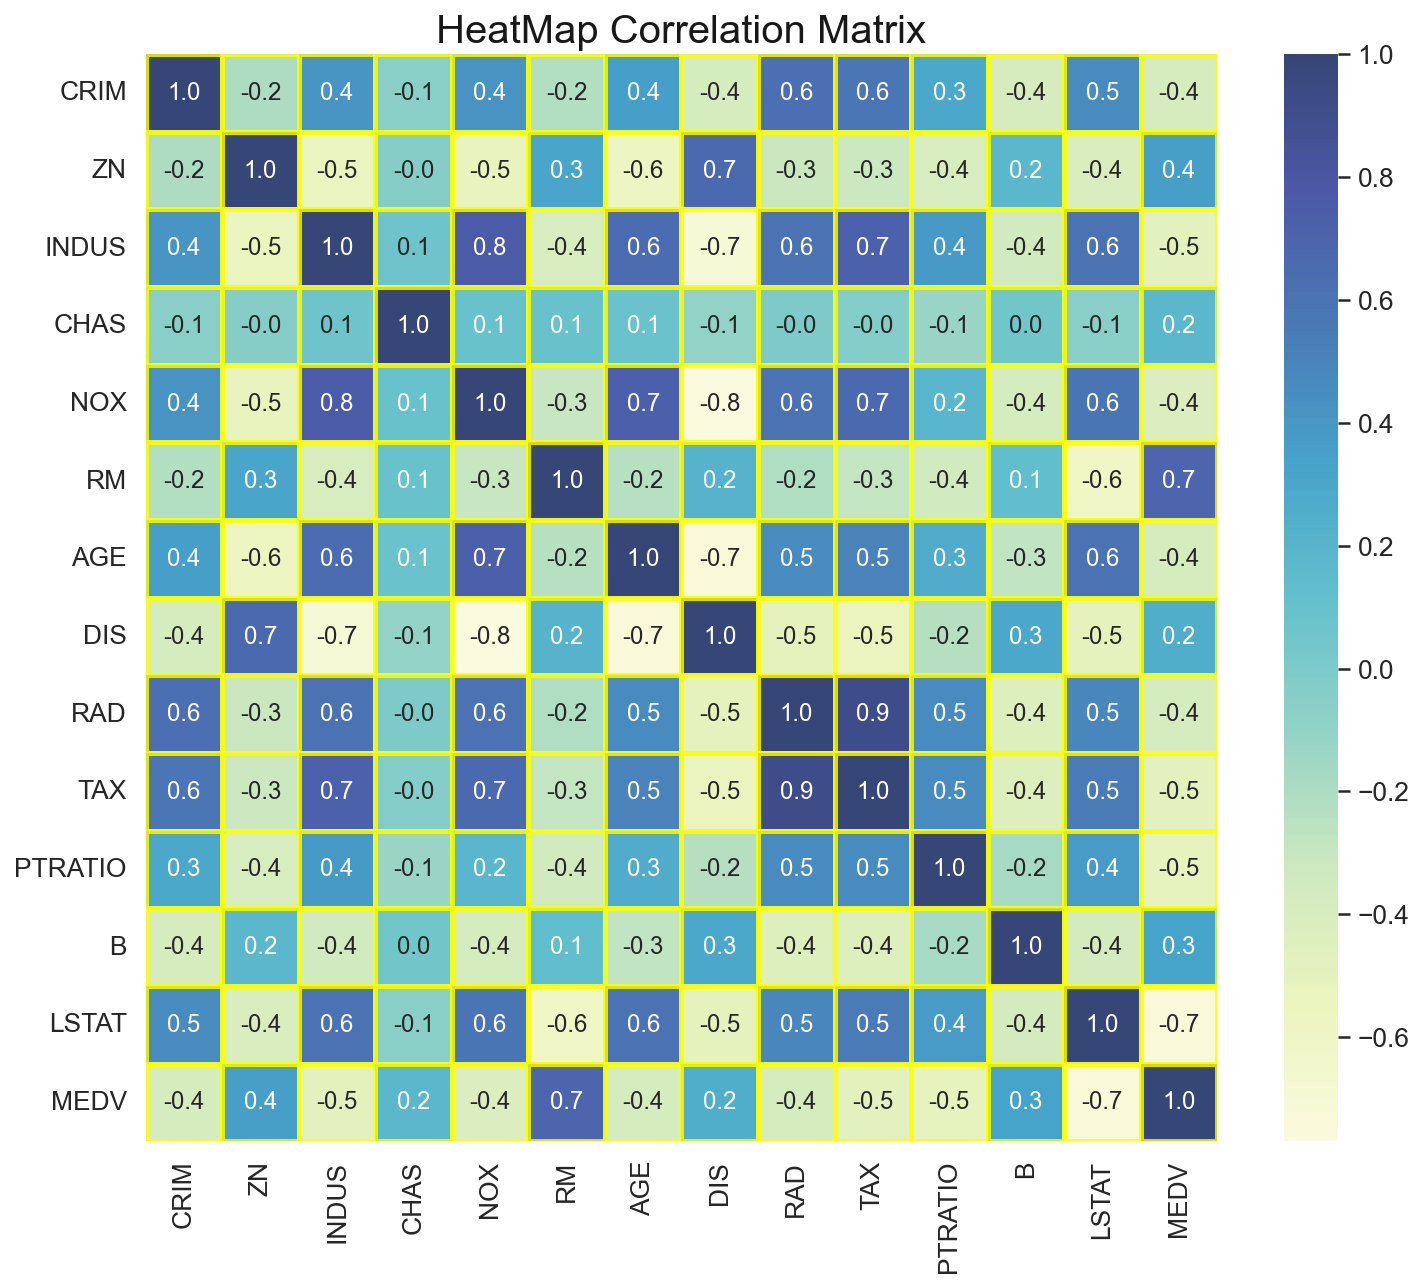

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
plt.title(
    'HeatMap Correlation Matrix', 
    size=20, 
    color='Black', 
    alpha=0.9)

sns.heatmap(
    corr, 
    annot=True, 
    fmt='.1F', 
    cmap='YlGnBu', 
    alpha=0.8, 
    annot_kws={'size':12}, 
    linewidths=2.5, 
    linecolor = 'yellow')

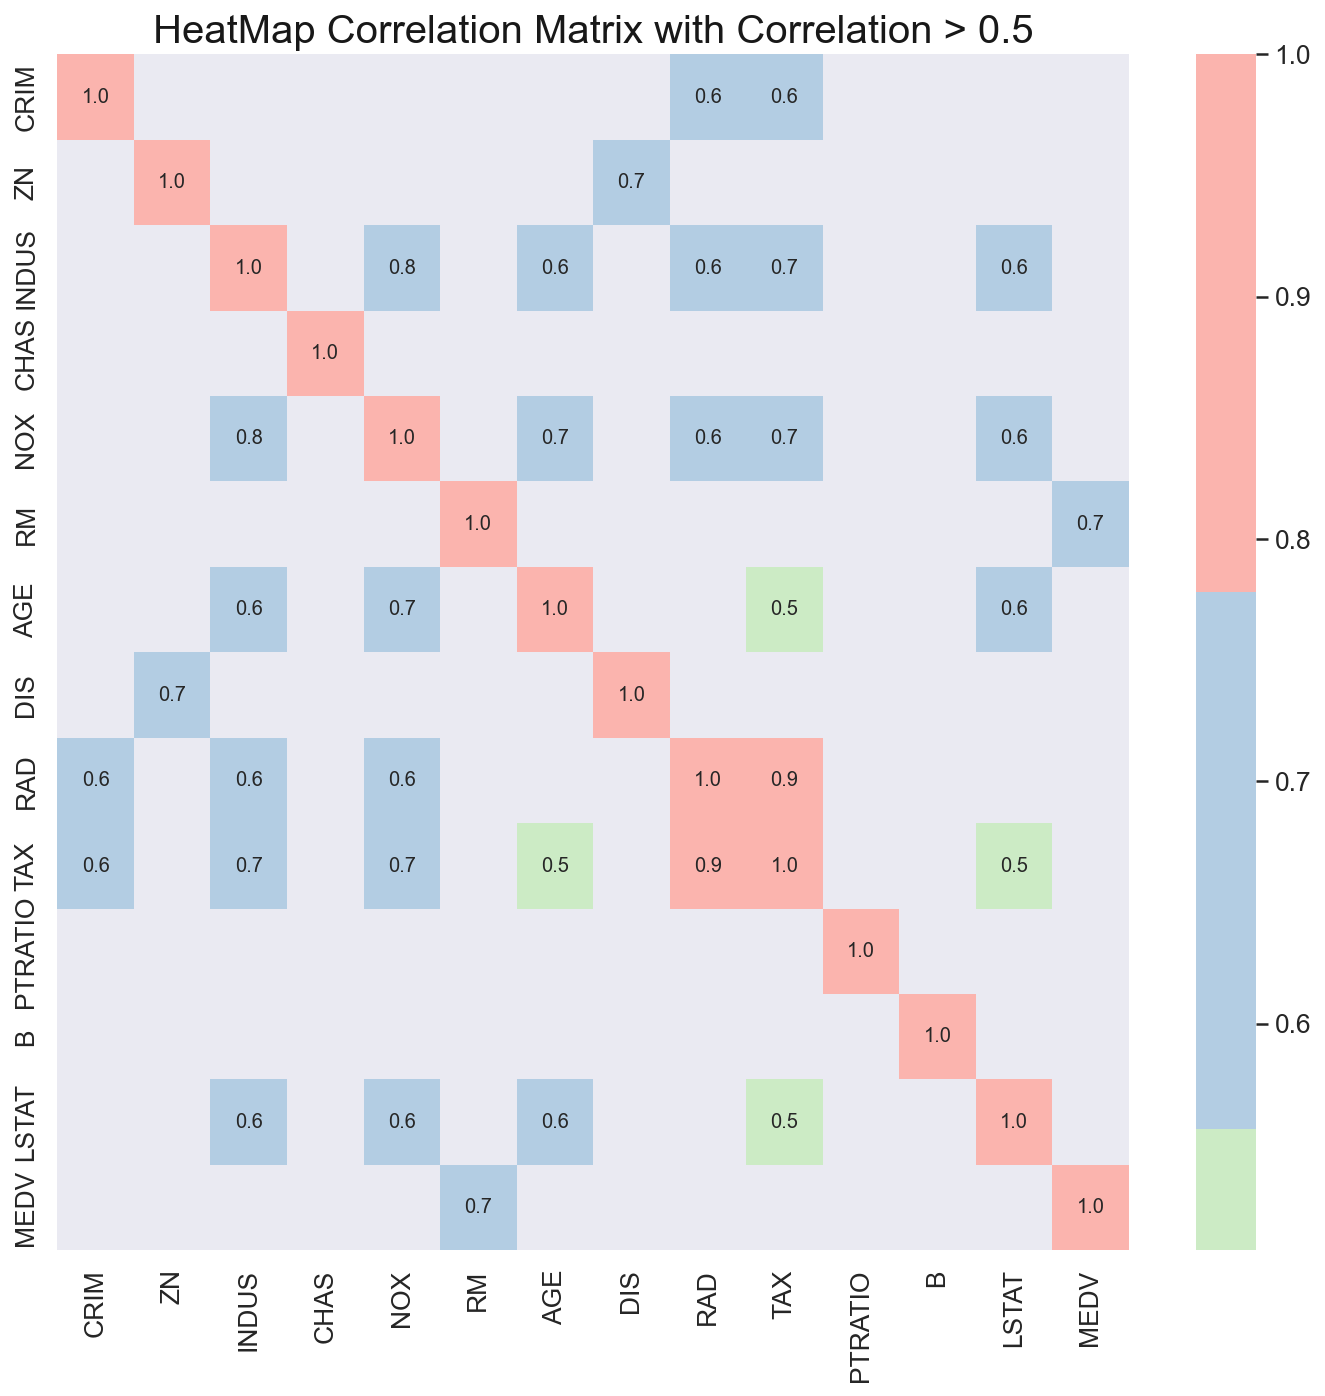

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(12,11)
plt.title(
    'HeatMap Correlation Matrix with Correlation > 0.5', 
    size=20, 
    color='Black', 
    alpha=0.9)

corr_modified = corr[corr >= 0.5]

sns.heatmap(
    corr_modified, 
    annot=True, 
    fmt='.1f', 
    cmap='Pastel1_r', 
    center=0);

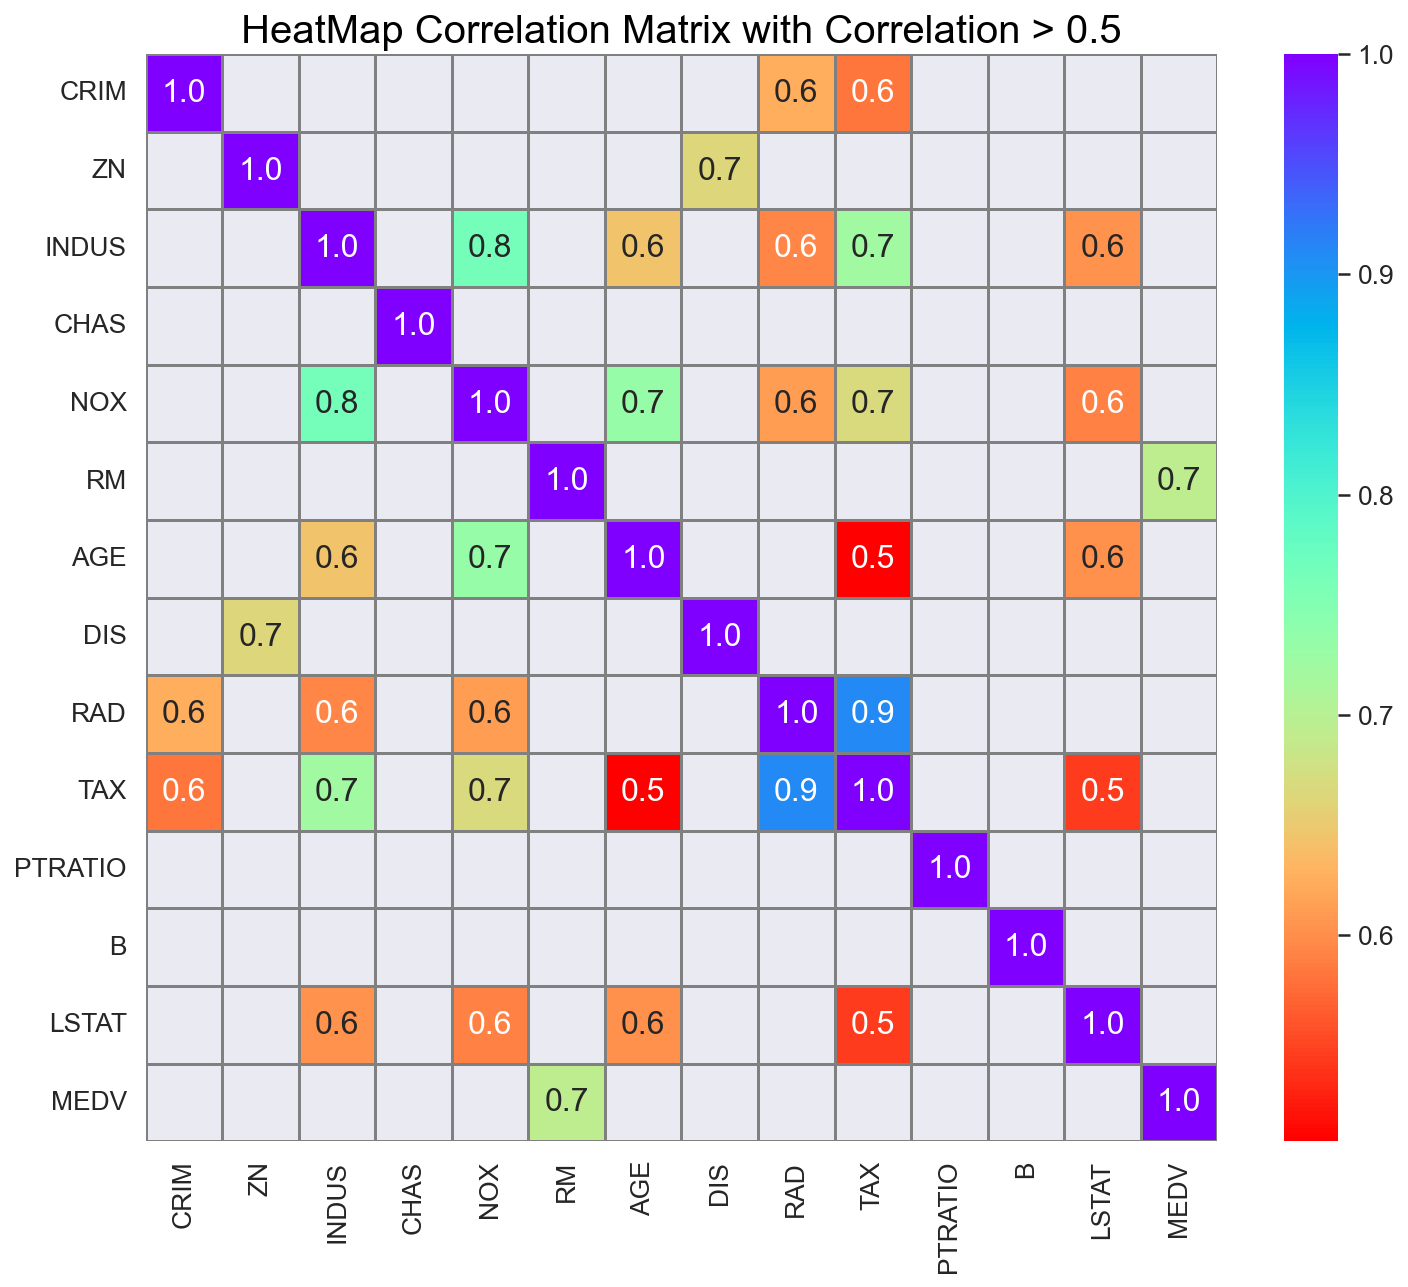

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
plt.title(
    'HeatMap Correlation Matrix with Correlation > 0.5', 
    size=20, 
    color='Black')

corr_modified = corr[corr >= 0.5]

sns.heatmap(
    corr_modified, 
    annot=True, 
    fmt='.1f', 
    cmap='rainbow_r', 
    annot_kws={'size':16}, 
    linewidth=1.5, 
    linecolor='grey');

Special thanks to Drazen Zaric for his contribution, `heatmapz`, shown below. 

For more information, check out the following:

- [heatmapz documentation](https://pypi.org/project/heatmapz/)
- [heatmap.py](https://github.com/dylan-profiler/heatmaps/blob/master/heatmap/heatmap.py)
- [Heatmapz Colab Example](https://colab.research.google.com/drive/1YSvER-U3cwGplSHyXwaCXYhOWfWO53Iy#scrollTo=1_yicqzYzUL3)
- [Better Heatmaps and Correlation Matrix Plots in Python](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)

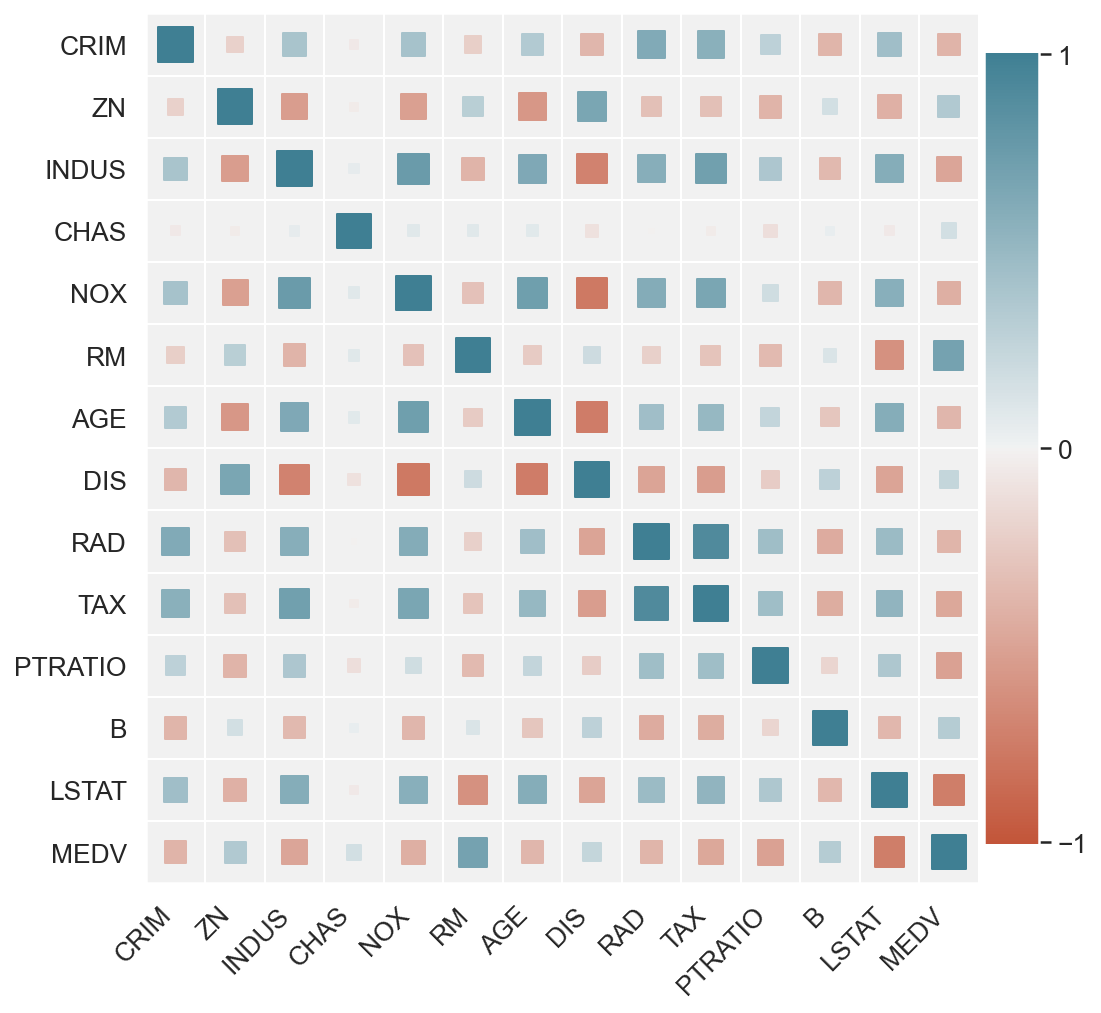

In [11]:
plt.figure(figsize=(8, 8))
corrplot(housing.corr(), size_scale=300);

In [12]:
fig = px.imshow(corr)
fig.show()

Special thanks to Yan Holtz for his work on the below and contribution to The Python Gallery. 

For more information: [Network from Correlation Matrix](https://python-graph-gallery.com/327-network-from-correlation-matrix/)

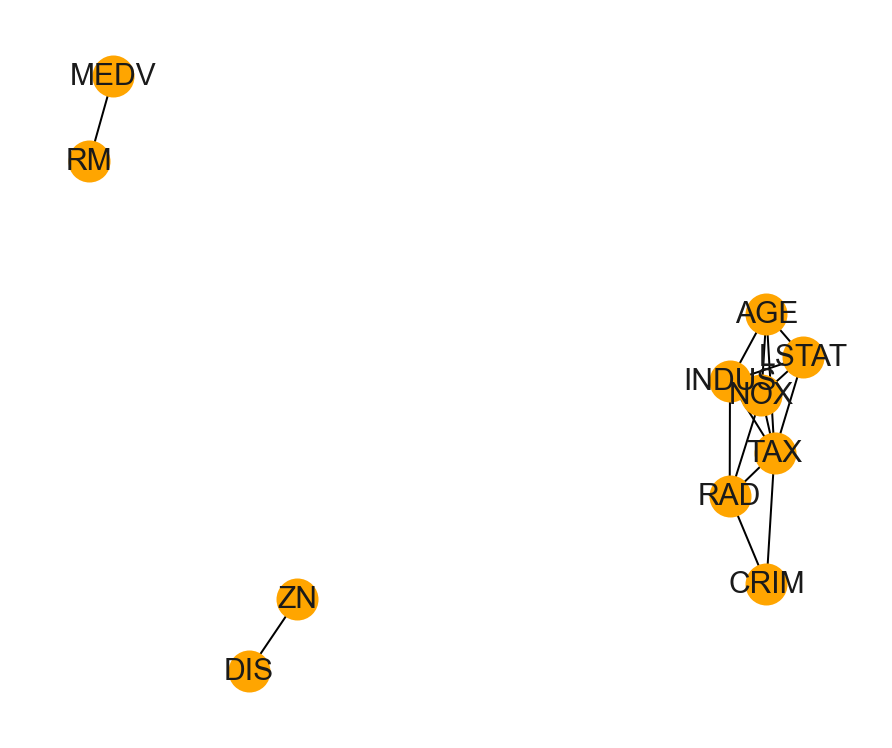

In [13]:
# https://python-graph-gallery.com/327-network-from-correlation-matrix/

# Transform it in a links data frame (3 columns only)
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > 0.5) & (links['var1'] != links['var2']) ]

# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)

Special thanks to Stephen Zapr for his work on the Solar Correlation Map. 

For more information: 
- [Github solar-correlation-map](https://github.com/Zapf-Consulting/solar-correlation-map)    
- [O'Reilly Solar Correlation Map](https://www.oreilly.com/content/a-new-visualization-to-beautifully-explore-correlations/)

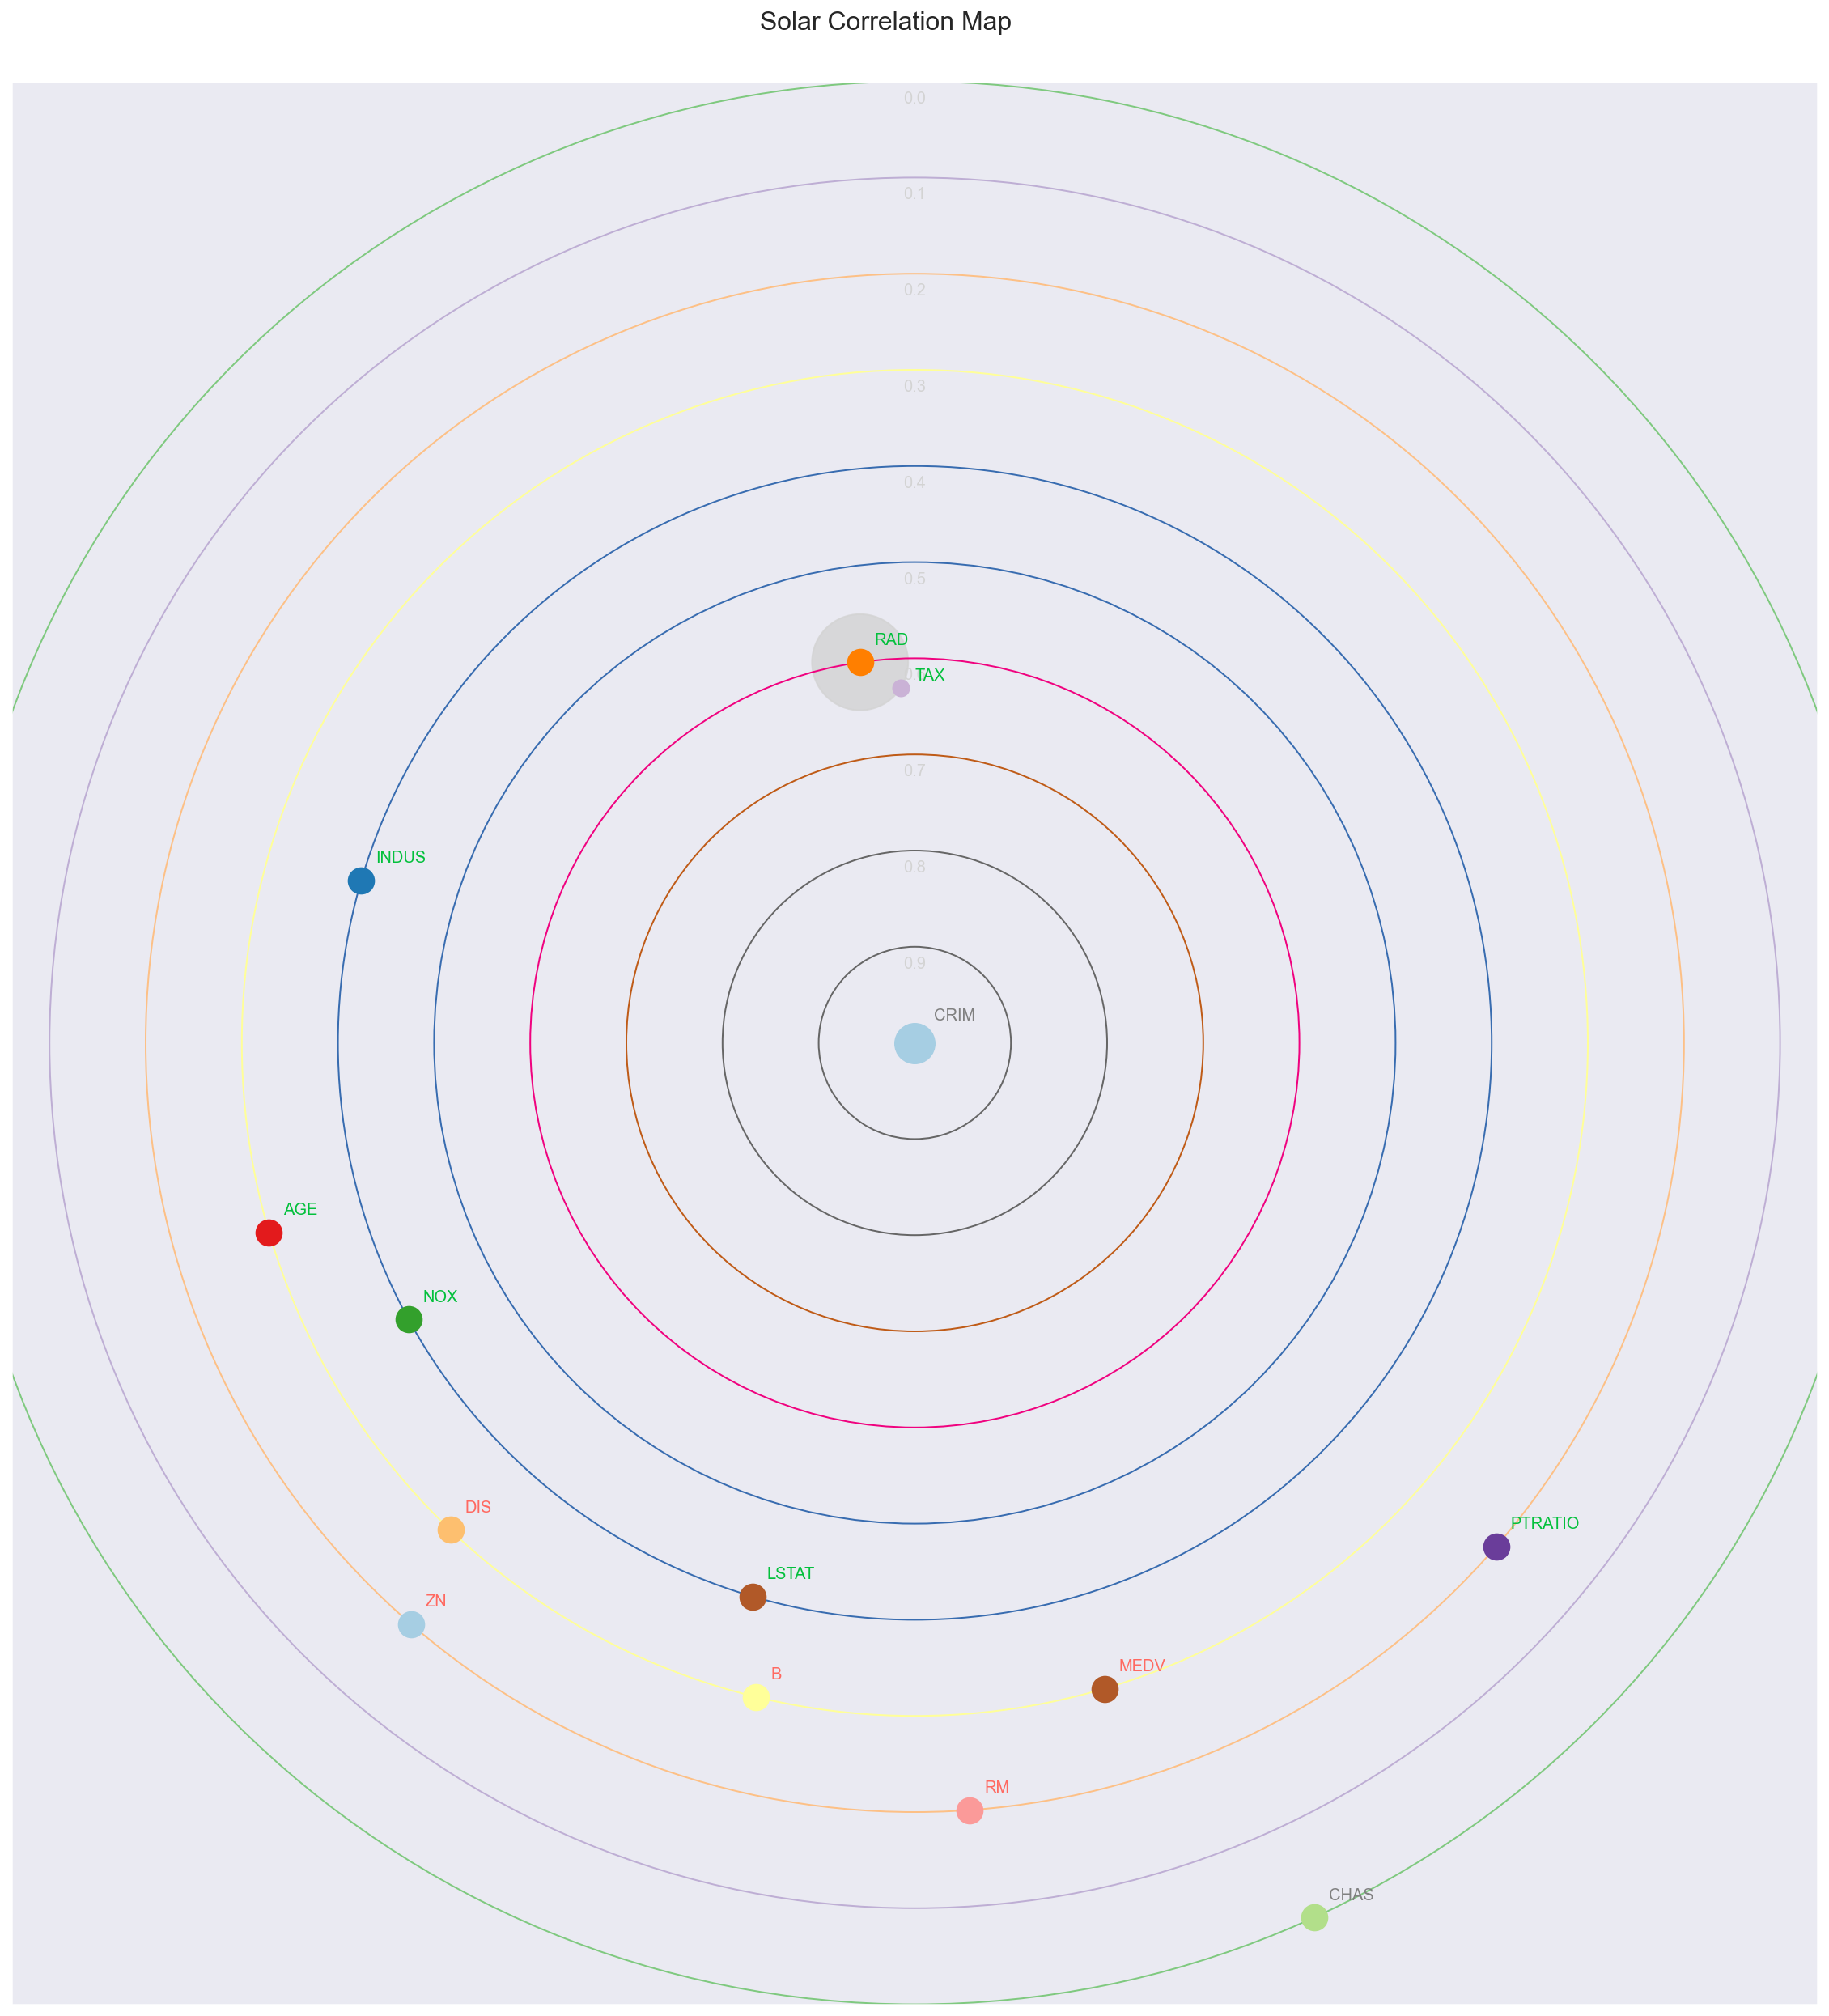

In [14]:
solar_corr.solar_corr(housing, housing.columns, 'CRIM', title='Solar Correlation Map')